In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 18

In [160]:
def create_bbox_spec_from_corners(x1,x2,y1,y2):
    return [x1,y1,x2-x1,y2-y1]

# Data Station

In [161]:
data_sizes = ['10MB', '100MB', '1GB','10GB']
data_size_nums = [1, 10, 100, 1000]
ds_data_dict = {}

cols = ['query_num', 'time_taken', 'dec_time', 'data_size']

# get all data in one pd dataframe
total_data = pd.DataFrame(columns=cols)
for i, data_size in enumerate(data_sizes):
    # secyan_medians = data_dict[data_size]['secyan_medians']
    # secyan_stdevs = data_dict[data_size]['secyan_stdevs']
    path = f'../datastation-escrow/data_comparisons/baseline/ds_data/{data_size}_2.csv'
    df = pd.read_csv(path, names=cols, header=None)
    
    # add a column with data_size
    df['data_size'] = data_size

    # make -1 values nan
    df = df.replace(-1, np.nan)
        
    # add to total_data
    total_data = pd.concat([total_data, df])

# print(total_data)
# groupby
for data_size in data_sizes:
    query_data = total_data[(total_data['data_size'] == data_size)]

    ds_medians = query_data.groupby('query_num')['time_taken'].median()
    ds_stdevs = query_data.groupby('query_num')['time_taken'].std()
    
    ds_data_dict[data_size] = {'ds_medians': ds_medians, 'ds_stdevs': ds_stdevs}
    
print(ds_data_dict)

{'10MB': {'ds_medians': query_num
1     1.747613
2     1.599875
3     1.833328
4     1.823053
5     1.865743
6     1.750805
7     1.854364
8     1.868598
9     1.916946
10    1.843133
11    1.569428
12    1.817198
13    1.591363
14    1.773701
15    1.748049
16    1.595806
17    1.765116
18    1.851890
19    1.796389
20    1.845792
21    1.827280
22    1.593805
Name: time_taken, dtype: float64, 'ds_stdevs': query_num
1     0.029585
2     0.002533
3     0.015920
4     0.006041
5     0.022226
6     0.007296
7     0.007927
8     0.004205
9     0.011642
10    0.012362
11    0.008681
12    0.008915
13    0.008282
14    0.015535
15    0.011016
16    0.033798
17    0.009581
18    0.014962
19    0.005149
20    0.009223
21    0.004629
22    0.034178
Name: time_taken, dtype: float64}, '100MB': {'ds_medians': query_num
1     3.089270
2     1.825005
3     3.419430
4     3.340962
5     3.410163
6     2.988143
7     3.408664
8     3.478058
9     3.642131
10    3.424211
11    1.751070
12    3.320193


/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_47512/3136020500.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total_data = pd.concat([total_data, df])


# DuckDB

In [162]:
data_sizes = ['10MB', '100MB', '1GB','10GB']
data_size_nums = [1, 10, 100, 1000]

duckdb_data_dict = {}

cols = ['query_num', 'time_taken', 'data_size']

total_data = pd.DataFrame(columns=cols)
for i, data_size in enumerate(data_sizes):
    path = f'../datastation-escrow/data_comparisons/baseline/baseline_data/{data_size}_2.csv'
    df = pd.read_csv(path, names=cols, header=None)
    
    # add a column with data_size
    df['data_size'] = data_size
    
    # make -1 values nan   
    df = df.replace(-1, np.nan)
        
    # add to total_data
    total_data = pd.concat([total_data, df])

# groupby
for data_size in data_sizes:
    query_data = total_data[(total_data['data_size'] == data_size)]

    baseline_medians = query_data.groupby('query_num')['time_taken'].median()
    baseline_stdevs = query_data.groupby('query_num')['time_taken'].std()
    
    duckdb_data_dict[data_size] = {'baseline_medians': baseline_medians, 'baseline_stdevs': baseline_stdevs}

print(duckdb_data_dict)

{'10MB': {'baseline_medians': query_num
1     0.320542
2     0.091462
3     0.404949
4     0.388388
5     0.340427
6     0.308585
7     0.409361
8     0.430780
9     0.463025
10    0.406701
11    0.081888
12    0.341653
13    0.107301
14    0.329849
15    0.317235
16    0.099990
17    0.329767
18    0.338319
19    0.331836
20    0.307286
21    0.321298
22    0.107585
Name: time_taken, dtype: float64, 'baseline_stdevs': query_num
1     0.000687
2     0.001634
3     0.001011
4     0.001141
5     0.000436
6     0.002831
7     0.003174
8     0.001818
9     0.005177
10    0.000309
11    0.001288
12    0.003412
13    0.000474
14    0.000867
15    0.002888
16    0.000908
17    0.003949
18    0.002862
19    0.001863
20    0.002500
21    0.001808
22    0.001248
Name: time_taken, dtype: float64}, '100MB': {'baseline_medians': query_num
1     1.058013
2     0.229553
3     1.308272
4     1.259195
5     1.251912
6     1.030990
7     1.325109
8     1.358561
9     1.439835
10    1.317189
11    0.1685

/var/folders/m3/fx4bfcrd7bd4526j17_84nrc0000gn/T/ipykernel_47512/387519008.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  total_data = pd.concat([total_data, df])


# Plots

### 10MB

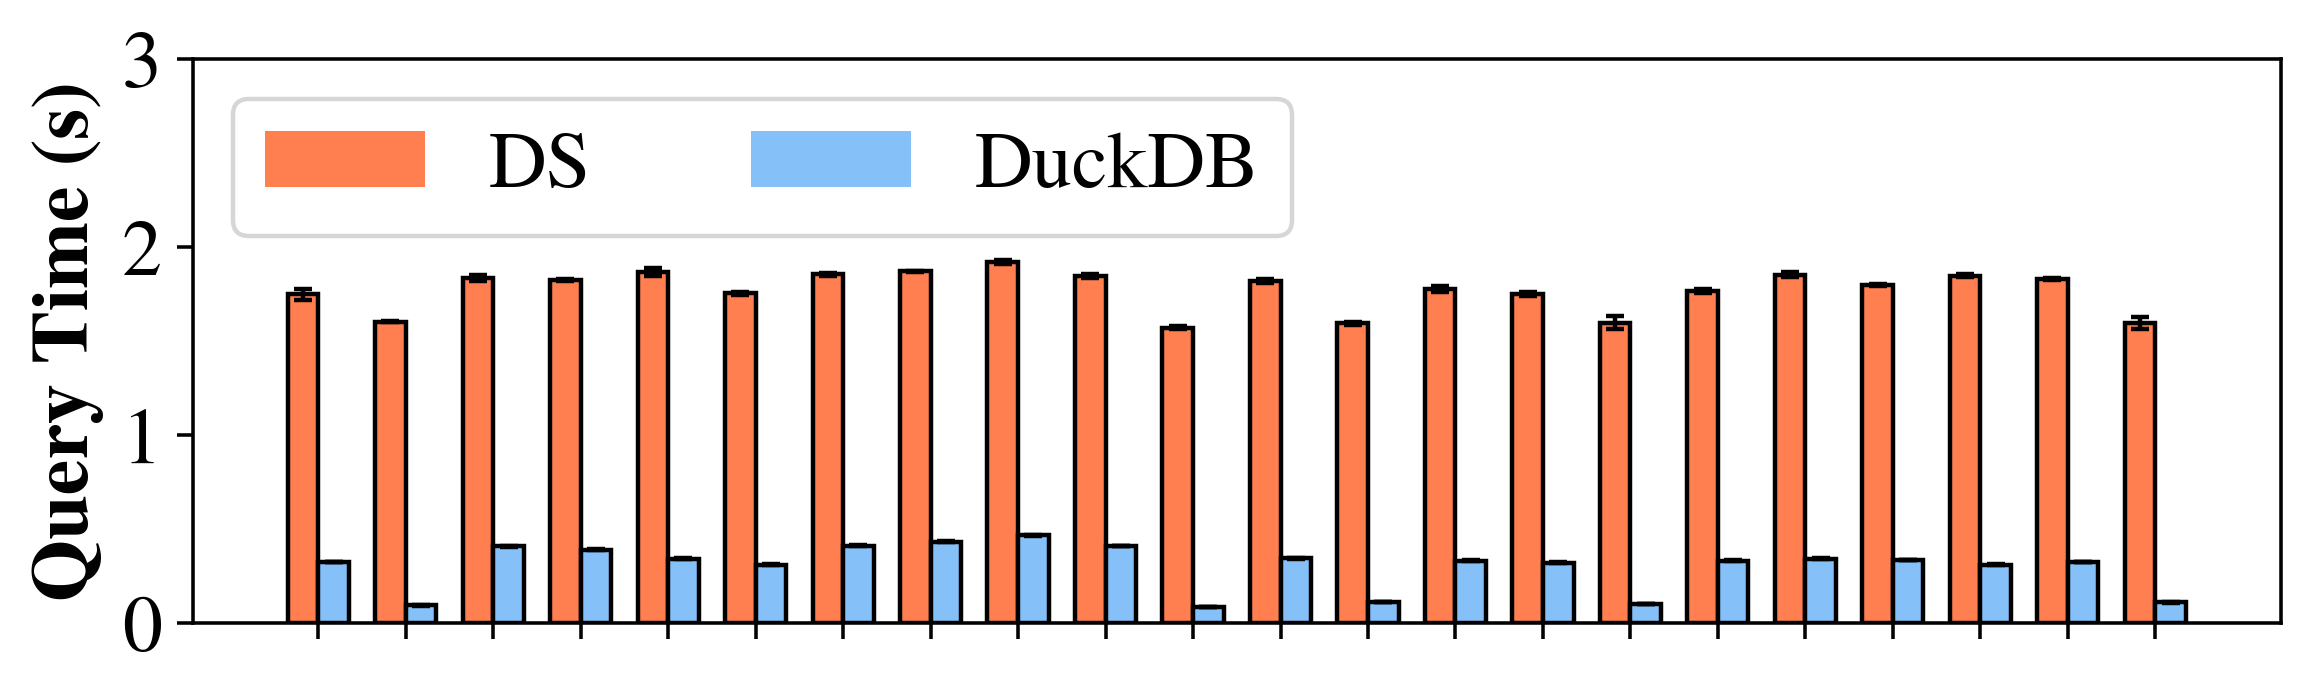

In [163]:
ds_medians = ds_data_dict['10MB']['ds_medians']
ds_stdevs = ds_data_dict['10MB']['ds_stdevs']
duckdb_medians = duckdb_data_dict['10MB']['baseline_medians']
duckdb_stdevs = duckdb_data_dict['10MB']['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(22) + 1

width = 0.35

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 3

fig = plt.figure(figsize=(7.5, 2), dpi=320)

ax = fig.add_subplot(111)
ax.set_box_aspect(0.27)  # Consistent aspect ratio
ax.set_position(create_bbox_spec_from_corners(0.12,0.99,0,1))  # Consistent position

# ds
ds_bar = ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,label="DS",
        color='coral'
        )
ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
# plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
#         #       rotation=90, 
#                 padding=padding
#               )

# duckdb
duckdb_bar = ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
# plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
#         #       rotation=90,
#               padding=padding
#               )

# axes = ax.gca()
ax.set_ylim([min_y,max_y])


# ax.set_xlabel("TPC-H Query Number", fontweight="bold")
ax.set_ylabel("Query Time (s)", fontweight="bold")
ax.legend(ncol=2, loc='upper left')
# ax.set_title("10MB Database Size")

# ax.set_xticks(X_axis, X_axis)
ax.set_xticks(X_axis, X_axis)
ax.set_xticklabels([])

plt.savefig("tpch_10MB.pdf",
            # bbox_inches='tight'
            )

plt.show()

### 100MB

Original Position: Bbox(x0=0.12, y0=0.0, x1=0.99, y1=1.0)
Active Position: Bbox(x0=0.12, y0=0.05956249999999996, x1=0.99, y1=0.9404375)


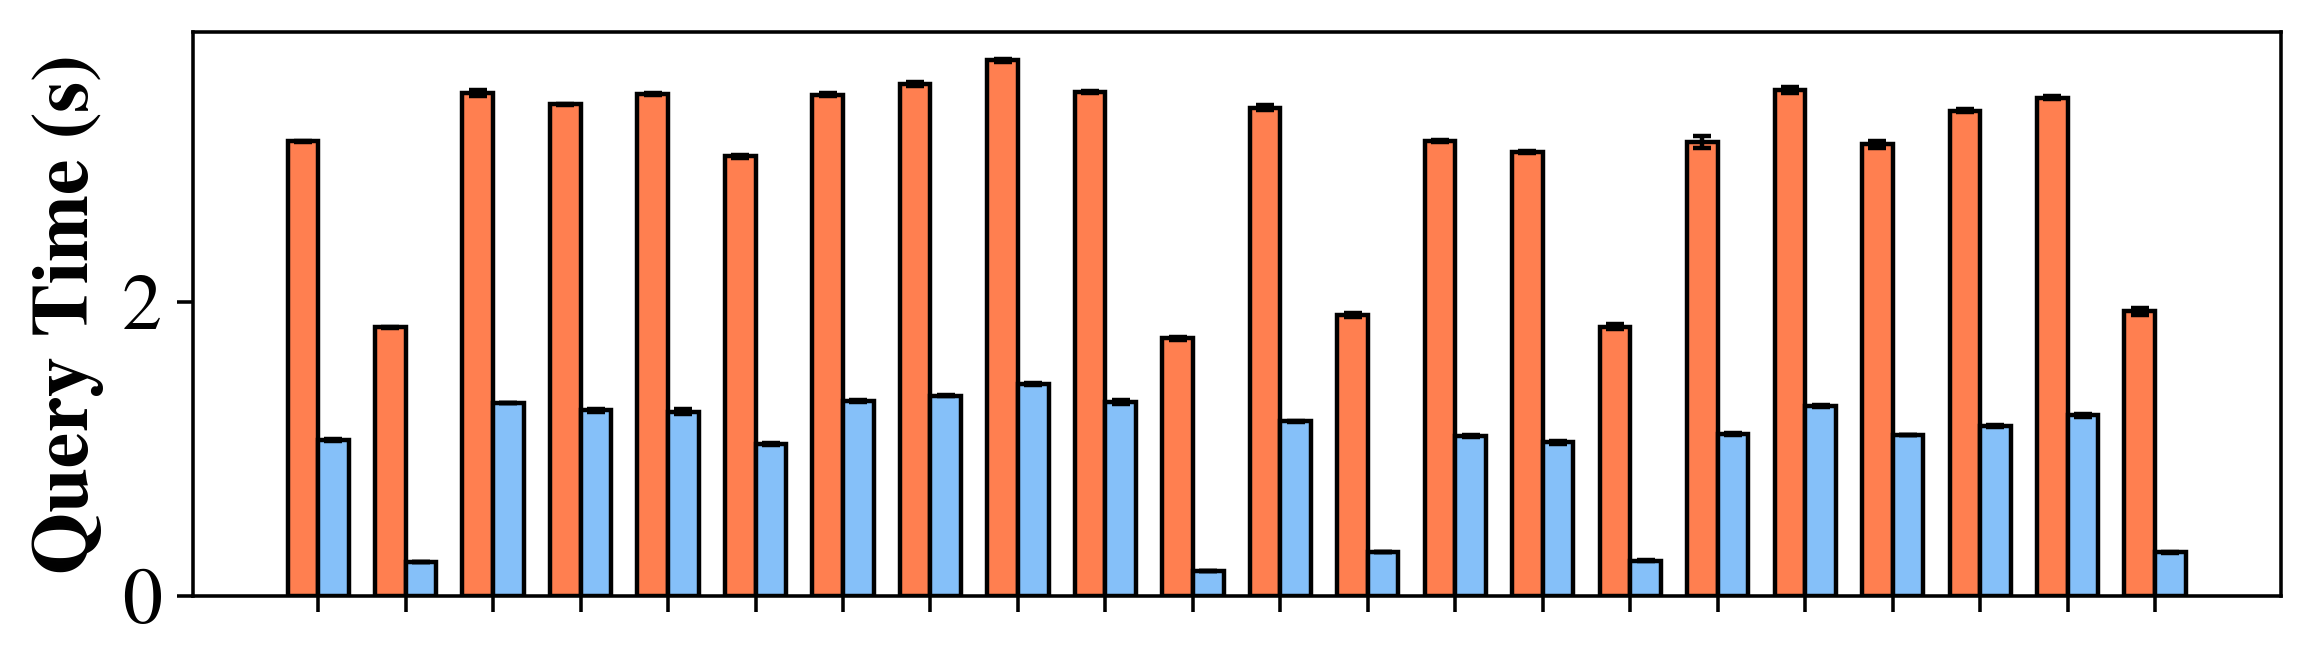

In [164]:
ds_medians = ds_data_dict['100MB']['ds_medians']
ds_stdevs = ds_data_dict['100MB']['ds_stdevs']
duckdb_medians = duckdb_data_dict['100MB']['baseline_medians']
duckdb_stdevs = duckdb_data_dict['100MB']['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(22) + 1

width = 0.35

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 2

fig = plt.figure(figsize=(7.5, 2), dpi=320)

ax = fig.add_subplot(111)
ax.set_box_aspect(0.27)  # Consistent aspect ratio
ax.set_position(create_bbox_spec_from_corners(0.12,0.99,0,1))  # Consistent position

print("Original Position:", ax.get_position(original=True))
print("Active Position:", ax.get_position(original=False))
# ds
ds_bar = ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,label="DS",
        color='coral'
        )
ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
# plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
#         #       rotation=90, 
#                 padding=padding
#               )

# duckdb
duckdb_bar = ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
# plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
#         #       rotation=90,
#               padding=padding
#               )

# axes = plt.gca()
# axes.set_ylim([min_y,max_y])


# ax.set_xlabel("TPC-H Query Number", fontweight="bold")
ax.set_ylabel("Query Time (s)", fontweight="bold")
# plt.legend(ncol=2, loc='upper left')
# ax.title("100MB Database Size")

# ax.set_xticks(X_axis, X_axis)
ax.set_xticks(X_axis, X_axis)
ax.set_xticklabels([])

plt.savefig("tpch_100MB.pdf")

plt.show()

### 1GB

Original Position: Bbox(x0=0.12, y0=0.0, x1=0.99, y1=1.0)
Active Position: Bbox(x0=0.12, y0=0.05956249999999996, x1=0.99, y1=0.9404375)


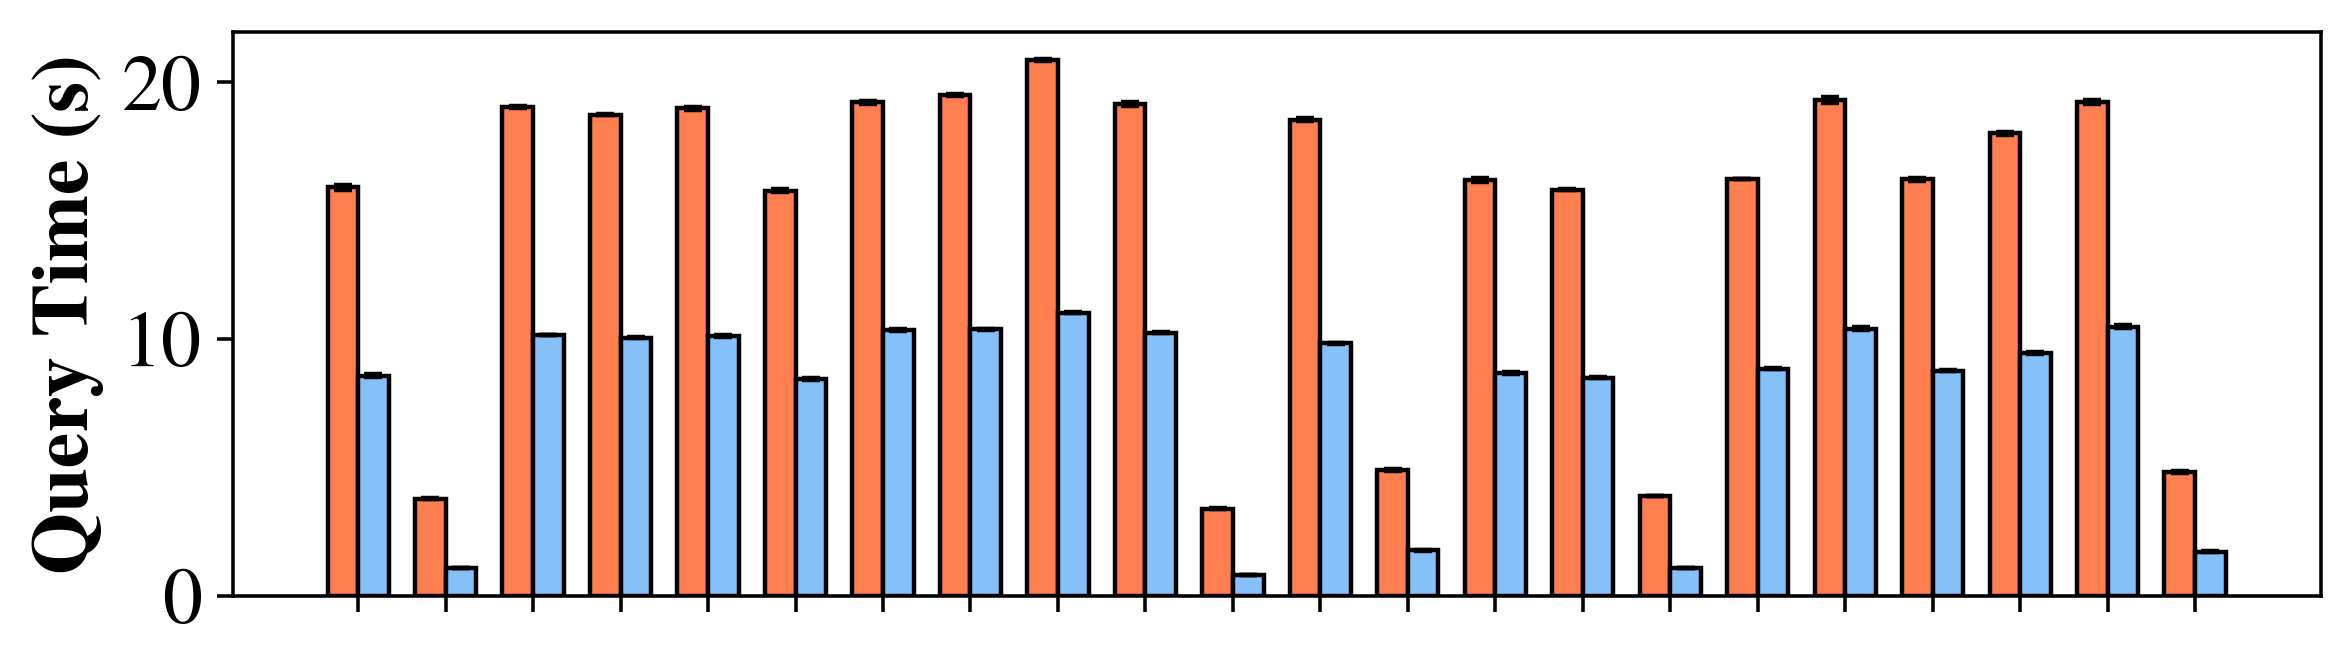

In [165]:
ds_medians = ds_data_dict['1GB']['ds_medians']
ds_stdevs = ds_data_dict['1GB']['ds_stdevs']
duckdb_medians = duckdb_data_dict['1GB']['baseline_medians']
duckdb_stdevs = duckdb_data_dict['1GB']['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(22) + 1

width = 0.35

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 2

fig = plt.figure(figsize=(7.5, 2), dpi=320)

ax = fig.add_subplot(111)
ax.set_box_aspect(0.27)  # Consistent aspect ratio
ax.set_position(create_bbox_spec_from_corners(0.12,0.99,0,1))  # Consistent position

print("Original Position:", ax.get_position(original=True))
print("Active Position:", ax.get_position(original=False))

# ds
ds_bar = ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,label="DS",
        color='coral'
        )
ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
# plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
#         #       rotation=90, 
#                 padding=padding
#               )

# duckdb
duckdb_bar = ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
# plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
#         #       rotation=90,
#               padding=padding
#               )

# axes = plt.gca()
# axes.set_ylim([min_y,max_y])


# ax.set_xlabel("TPC-H Query Number", fontweight="bold")
ax.set_ylabel("Query Time (s)", fontweight="bold")
# plt.legend(ncol=2, loc='upper left')
# ax.title("1GB Database Size")

ax.set_xticks(X_axis, X_axis)
ax.set_xticklabels([])
# ax.set_xticks([])

plt.savefig("tpch_1GB.pdf")

plt.show()

### 10GB

Original Position: Bbox(x0=0.12, y0=0.2, x1=0.99, y1=1.0)
Active Position: Bbox(x0=0.12, y0=0.24764999999999998, x1=0.99, y1=0.95235)


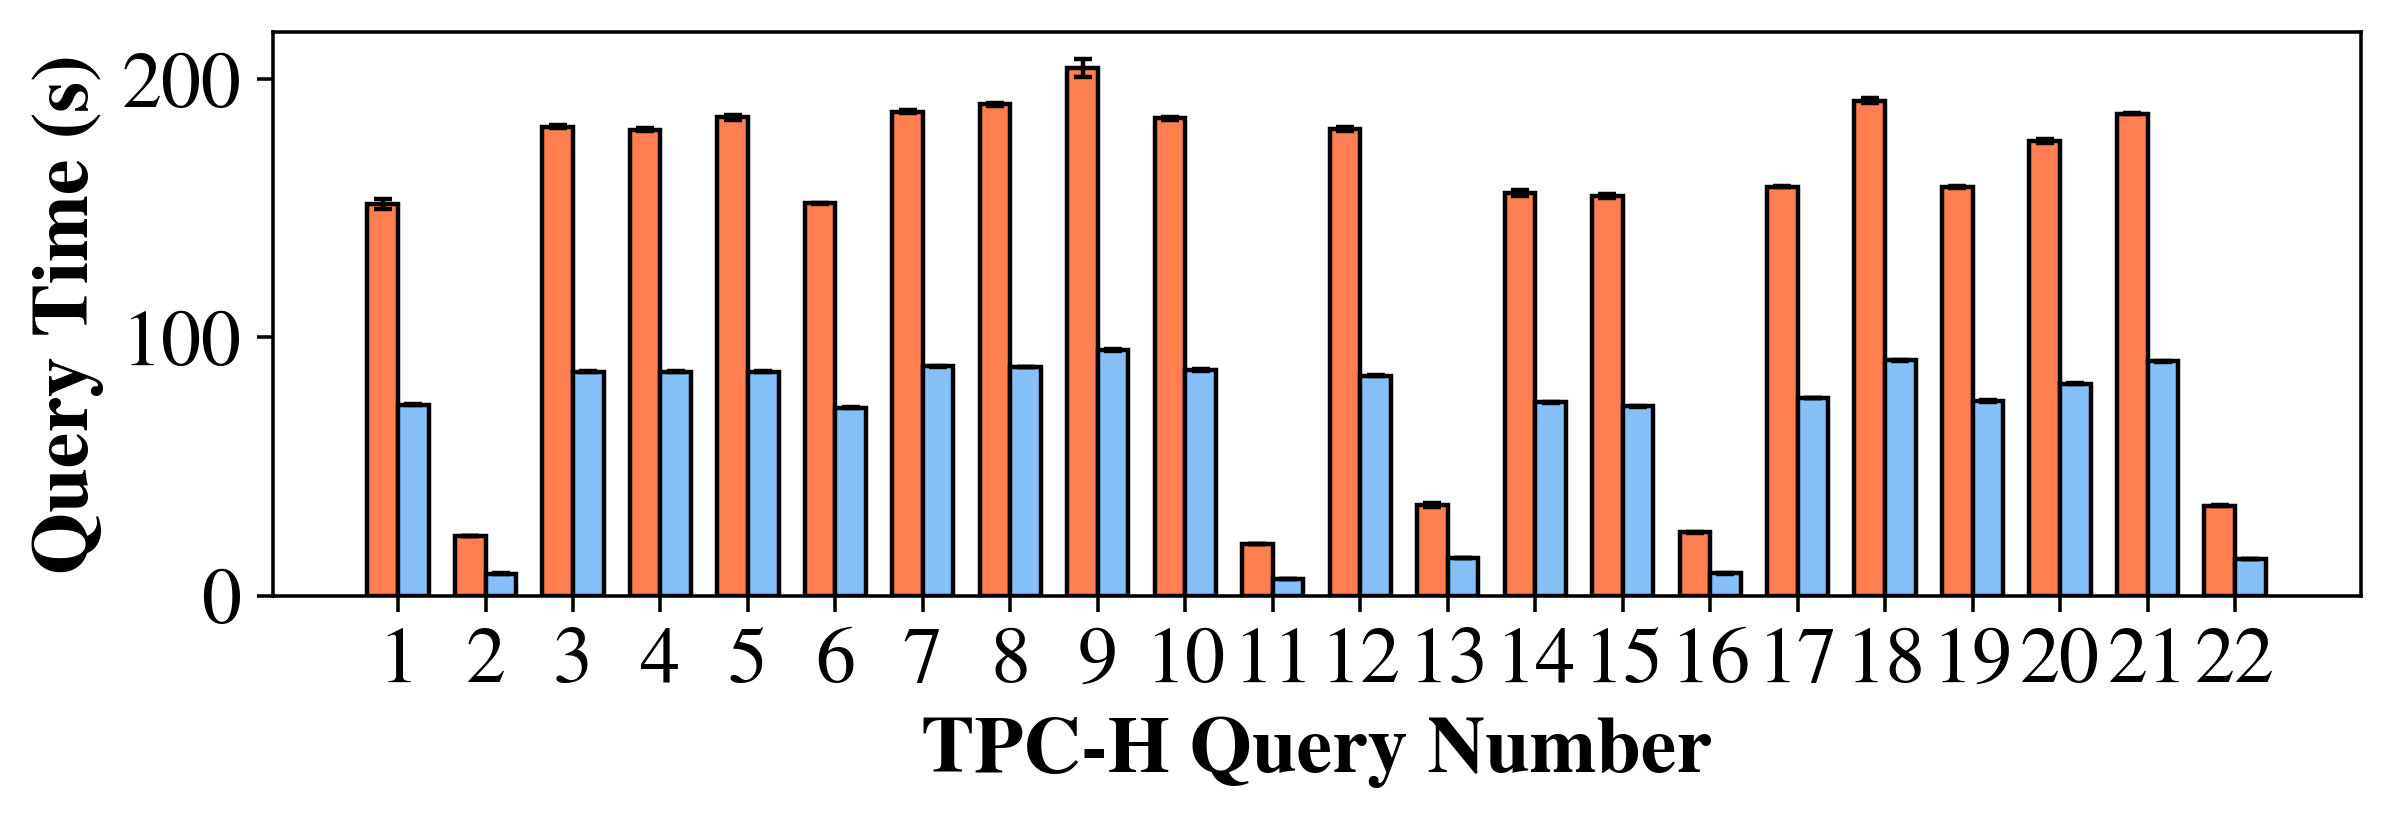

In [166]:
ds_medians = ds_data_dict['10GB']['ds_medians']
ds_stdevs = ds_data_dict['10GB']['ds_stdevs']
duckdb_medians = duckdb_data_dict['10GB']['baseline_medians']
duckdb_stdevs = duckdb_data_dict['10GB']['baseline_stdevs']

bar_label_font_size = 10
padding = 3

X_axis = np.arange(22) + 1

width = 0.35

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)
min_y = 0.00
max_y = 2

fig = plt.figure(figsize=(7.5, 2.5), dpi=320)

ax = fig.add_subplot(111)
ax.set_box_aspect(0.27)  # Consistent aspect ratio
ax.set_position(create_bbox_spec_from_corners(0.12,0.99,0.2,1))  # Consistent position

print("Original Position:", ax.get_position(original=True))
print("Active Position:", ax.get_position(original=False))

# ds
ds_bar = ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,label="DS",
        color='coral'
        )
ax.bar(x=X_axis-0.5*width,width=width,height=ds_medians,yerr=ds_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# ds_label = map(lambda n: '{0:.2f}'.format(n),ds_medians)
# plt.bar_label(ds_bar, ds_label, fontsize=bar_label_font_size,
#         #       rotation=90, 
#                 padding=padding
#               )

# duckdb
duckdb_bar = ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,label="DuckDB",
        color='#85C0F9'
        )
ax.bar(x=X_axis+0.5*width,width=width,height=duckdb_medians,yerr=duckdb_stdevs,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )
# duckdb_label = map(lambda n: '{0:.2f}'.format(n),duckdb_medians)
# plt.bar_label(duckdb_bar, duckdb_label, fontsize=bar_label_font_size,
#         #       rotation=90,
#               padding=padding
#               )

# axes = plt.gca()
# axes.set_ylim([min_y,max_y])


ax.set_xlabel("TPC-H Query Number", fontweight="bold")
ax.set_ylabel("Query Time (s)", fontweight="bold")
# plt.legend(ncol=2, loc='upper left')
# ax.title("10GB Database Size")

ax.set_xticks(X_axis, X_axis)

plt.savefig("tpch_10GB.pdf")

plt.show()